In [1]:
import numpy as np
import matplotlib.pyplot as plt

file_path = 'Tekstfiler/240416,aq.txt'
with open(file_path, 'r') as file:
    lines = file.readlines()

products = lines[0].strip().split(',')
stoffer_aq = np.array([float(num) for num in lines[1].strip().split()])

non_zero_indices = np.where(stoffer_aq != 0)[0]

stoffer_aq = stoffer_aq[non_zero_indices]
products = [products[i] for i in non_zero_indices]


Ai_tot = np.sum(stoffer_aq)
A_frac = stoffer_aq / Ai_tot

#print("Length of A_frac:", len(A_frac))

file_path_rf = 'Tekstfiler/Rf_liquid_analysis.txt'
with open(file_path_rf, 'r') as file:
    lines = file.readlines()

Rf_text = lines[0].strip().split(',')
Rf_values = np.array([float(num) for num in lines[1].strip().split(',')])

"""print("Rf_text:", Rf_text)
print("Length of Rf_text:", len(Rf_text))
print("Length of Rf_values:", len(Rf_values))"""

relevant_Rf_values = []

for product in products:
    match_found = False
    product = product.strip()  
    for i, text in enumerate(Rf_text):
        if product.lower() in text.lower(): 
            if i < len(Rf_values):  
                relevant_Rf_values.append(Rf_values[i])
            match_found = True
            break
    if not match_found:
        print(f"No match found for product: {product}") 

'''print("Length of relevant_Rf_values:", len(relevant_Rf_values))
print("Relevant Rf values:", relevant_Rf_values)'''

if len(A_frac) != len(relevant_Rf_values):
    print("Warning: Lengths of A_frac and relevant_Rf_values do not match.")

# Calculate the result if lengths match
if len(A_frac) == len(relevant_Rf_values):
    Wr = relevant_Rf_values * A_frac
    print("Wr:", Wr)
else:
    print("Cannot calculate result due to length mismatch.")




Wr_tot = np.sum(Wr)

# Normalize Wr_array
Wr_normalised = Wr / Wr_tot

#############  ENDRE #############
vekt_prove = 22.17
#############  ENDRE #############
Wr_normalised[1] *= vekt_prove

weight_distribution = []
for row in Wr_normalised:
    weight_distribution.append([row])

max_lengths = [max(len(str(entry)) for entry in column) for column in weight_distribution]

print("Weight distribution in sample: ")
for name, row in zip(products, weight_distribution):
    print(f"{name}: {' | '.join(f'{entry:{max_lengths[i]}}' for i, entry in enumerate(row))}")


Wr: [0.08423922 0.02684918 0.14665379 0.59116027 0.08017951 0.01402885
 0.09210274 0.13506468 0.02574361 0.02261827 0.08860114 0.09204053
 0.02933316 0.0573351  0.09308311 0.00312475 0.01298794 0.25964112]
Weight distribution in sample: 
Methyl alcohol: 0.04541719351837591
 Acetone:  0.3209244141562216
 Acetic acid:  0.0790677269429916
 Propanoic acid:  0.3187213832436505
 Butanoic acid: 0.04322842062466136
 Succindialdehyde: 0.0075635903940540206
 Furfural: 0.04965677594169016
 2 cyclopenten 1 one: 0.07281950898490783
 2 propanone: 0.013879548845868984
 2 cyclopenten 1 one 2 methyl: 0.012194536662004561
 Butyrolactone: 0.04776890539023827
 2 cyclopenten 1 one 2 hydroxy: 0.04962323744861921
 Phenol: 0.015814842034275314
 2 cyclopenten 1 one 3 methyl: 0.030911957015799678
 2 cyclopenten 1 one 2 hydroxy 3 methyl: 0.050185337310835756
 2 cyclopenten 1 one 2 3 dimethyl: 0.001684695284717296
 p cresol: 0.0070023884127543385
 1 3 Benzenediol 4 ethyl: 0.13998433560913684


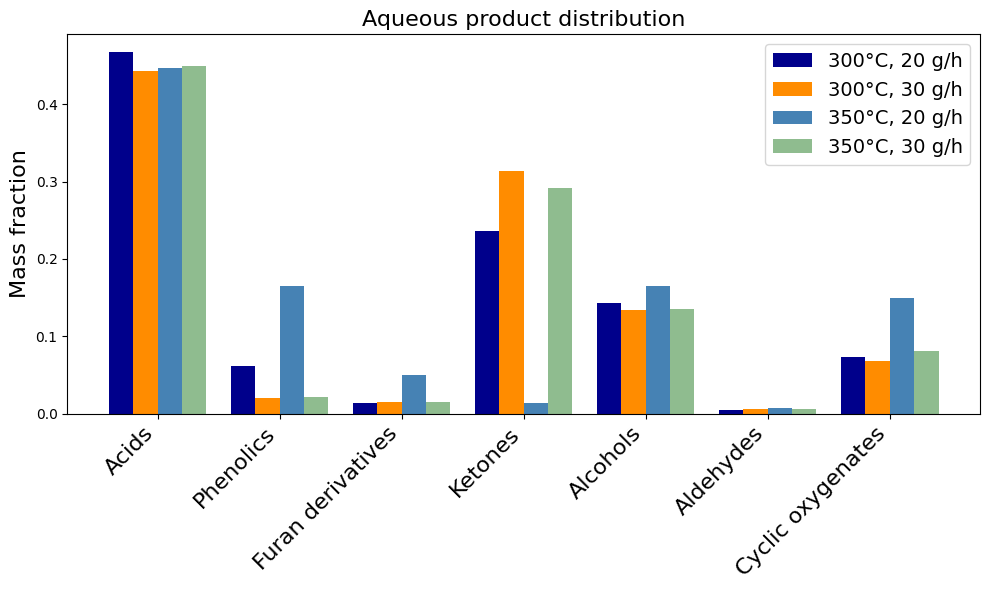

In [3]:
products = ["Acids", "Phenolics", "Furan derivatives", "Ketones", "Alcohols", "Aldehydes", "Cyclic oxygenates"]
values_aq_16 = [0.447495301,  0.165192834, 0.050386146, 0.014083415, 0.165422484, 0.007674686, 0.149745133]
values_aq_19 = [0.44922971,  0.021187709, 0.01479849, 0.291909592, 0.135636491, 0.005922371, 0.081315637]
values_aq_23 = [0.4670528,  0.061802952, 0.014311316, 0.235705825, 0.143175878, 0.004442378, 0.073508851]
values_aq_25 = [0.442527585,  0.020871607, 0.014577709, 0.313990489, 0.13361291, 0.005834015, 0.068585686]

plt.figure(figsize=(10, 6))

bar_width = 0.2
r1 = [x - 1.5 * bar_width for x in range(len(products))]  
r2 = [x - 0.5 * bar_width for x in range(len(products))]  
r3 = [x + 0.5 * bar_width for x in range(len(products))]  
r4 = [x + 1.5 * bar_width for x in range(len(products))]  

#colors = ['darkblue','tomato','darkseagreen', 'darkorange','steelblue','mediumvioletred']
plt.bar(r1, values_aq_23, width=bar_width, color='darkblue', label='300\u00B0C, 20 g/h') 
plt.bar(r2, values_aq_25, width=bar_width, color='darkorange', label='300\u00B0C, 30 g/h')
plt.bar(r3, values_aq_16, width=bar_width, color='steelblue', label='350\u00B0C, 20 g/h')
plt.bar(r4, values_aq_19,  width=bar_width, color='darkseagreen', label='350\u00B0C, 30 g/h')

plt.title('Aqueous product distribution',fontsize=16)
plt.ylabel('Mass fraction',fontsize=16)

middle_positions = [x for x in range(len(products))]
plt.xticks(middle_positions, products, rotation=45, ha='right',fontsize=16)

plt.tight_layout()
plt.legend(fontsize=14)
plt.show()

